In [1]:
import graphlab
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
loadPath = 'E:/celtraMiningFrik/'
savePath = loadPath

In [7]:
def prepareData(data, perct, isTestDataset = False):
    
    if not isTestDataset:   
        data['ADLOADINGTIME']=data['ADLOADINGTIME'].astype(float)
        print(np.percentile(data['ADLOADINGTIME'],perct))
        if perct < 100:
            data = data[data['ADLOADINGTIME']<np.percentile(data['ADLOADINGTIME'],perct)] 
            
    #convert to int types
    data['GEOIP_LAT'] = data['GEOIP_LAT'].apply(lambda x: '0' if x=='null' else x)
    data['GEOIP_LAT']=data['GEOIP_LAT'].astype(float)
    data['GEOIP_LNG'] = data['GEOIP_LNG'].apply(lambda x: '0' if x=='null' else x)
    data['GEOIP_LNG']=data['GEOIP_LNG'].astype(float)
    data['UA_MOBILEDEVICE'] = data['UA_MOBILEDEVICE'].apply(lambda x: '0' if x=='null' else x)
    data['UA_MOBILEDEVICE']=data['UA_MOBILEDEVICE'].astype(int)    
    data['TIMESTAMP']=data['TIMESTAMP'].astype(int)
    data['HOSTWINDOWHEIGHT'] = data['HOSTWINDOWHEIGHT'].apply(lambda x: '0' if x=='null' else x)
    data['HOSTWINDOWHEIGHT']=data['HOSTWINDOWHEIGHT'].astype(int)
    data['HOSTWINDOWWIDTH'] = data['HOSTWINDOWWIDTH'].apply(lambda x: '0' if x=='null' else x)
    data['HOSTWINDOWWIDTH']=data['HOSTWINDOWWIDTH'].astype(int)
    data['TOPMOSTREACHABLEWINDOWHEIGHT'] = data['TOPMOSTREACHABLEWINDOWHEIGHT'].apply(lambda x: '0' if x=='null' else x)
    data['TOPMOSTREACHABLEWINDOWHEIGHT']=data['TOPMOSTREACHABLEWINDOWHEIGHT'].astype(int)
    data['TOPMOSTREACHABLEWINDOWWIDTH'] = data['TOPMOSTREACHABLEWINDOWWIDTH'].apply(lambda x: '0' if x=='null' else x)
    data['TOPMOSTREACHABLEWINDOWWIDTH']=data['TOPMOSTREACHABLEWINDOWWIDTH'].astype(int)


    data['TOPMOSTREACHABLEWINDOWAREA'] = data['TOPMOSTREACHABLEWINDOWWIDTH']*data['TOPMOSTREACHABLEWINDOWHEIGHT'];
    
    data['GEOIP_COUNTRY'] = data['GEOIP_COUNTRY'] + '_' + data['GEOIP_REGION'] 
    data['GEOIP_COUNTRY'] = data['GEOIP_COUNTRY'].apply(lambda x: x if 'United States' in x.split('_')[0] else x.split('_')[0])

    data['ERRORSJSON'] = data['ERRORSJSON'].apply(lambda x: x.replace('"',''))
    data['FILESJSON'] = data['FILESJSON'].apply(lambda x: x.replace('"',''))
    
    def extractImageSize(sIn):
        sIn = sIn.replace('[','')
        sIn = sIn.replace('}','')
        sIn = sIn.replace(']','')
        sIn = sIn.replace('{type:image,size:','')
        numberList = [int(s) for s in sIn.split(',') if s.isdigit()]
        if len(numberList) == 0:
            numberList = 0
        return np.sum(numberList)
    
    def extractVideoSize(sIn):
        sIn = sIn.replace('[','')
        sIn = sIn.replace('}','')
        sIn = sIn.replace(']','')
        sIn = sIn.replace('{type:video,size:','')
        numberList = [int(s) for s in sIn.split(',') if s.isdigit()]
        if len(numberList) == 0:
            numberList = 0
        return np.sum(numberList)

    data['FILESJSON_IMGSIZE'] = data['FILESJSON'].apply(extractImageSize)
    data['FILESJSON_VIDSIZE'] = data['FILESJSON'].apply(extractVideoSize)

    data['COMBINEDID'] = data['ACCOUNTID']+data['CAMPAIGNID']+data['CREATIVEID']
    data['COMBINEDEXTERNALID'] = data['EXTERNALPLACEMENTID']+data['EXTERNALSITEID']+data['EXTERNALSUPPLIERID']    

    data['PLATFORMCOMBINED'] = data['PLATFORM']+data['PLATFORMVERSION']
    data['PLATFORMCOMBINED'] = data['PLATFORMCOMBINED'].apply(lambda x : x.replace('null', ''))
    data['PLATFORMCOMBINED'] = data['PLATFORMCOMBINED'].apply(lambda x : 'NA' if x == '' else x)
    
    data['UA_OSCOMB'] = data['UA_OS']+data['UA_OSVERSION']
    

    data['INTENDENTISACTUALDEVICETYPE'] = data['INTENDEDDEVICETYPE']==data['ACTUALDEVICETYPE']
    data['PLATFORMCOMBINEDISOSCAOMB'] = data['PLATFORMCOMBINED']==data['UA_OSCOMB']

    
    # remove unneeded columns
    
    #data.remove_columns(['UA_OS', 'UA_OSVERSION']);
    #data.remove_columns(['PLATFORM','PLATFORMVERSION']);
    #data.remove_columns(['UA_PLATFORM','UA_PLATFORMVERSION']);
    #data.remove_columns(['CDNNAME','UA_DEVICETYPE','ACTUALDEVICETYPE']);
    #data.remove_column('EXTERNALPLACEMENTID');
    #data.remove_column('EXTERNALSITEID');
    #data.remove_column('EXTERNALSUPPLIERID');
    #data.remove_column('ACCOUNTID');
    #data.remove_column('CAMPAIGNID');
    #data.remove_column('CREATIVEID');
    #data.remove_column('TOPMOSTREACHABLEWINDOWWIDTH');
    #data.remove_column('TOPMOSTREACHABLEWINDOWHEIGHT');
    #data.remove_column('HOSTWINDOWWIDTH');
    #data.remove_column('HOSTWINDOWHEIGHT');
    #data.remove_column('DEVICEORIENTATION');
    #data.remove_column('UA_MOBILEDEVICE');
    #data.remove_column('EXTERNALCREATIVEID');
    #data.remove_column('NETWORKTYPE');
    #data.remove_column('GEOIP_TIMEZONE');
    #data.remove_column('GEOIP_METROCODE');
    #data.remove_column('GEOIP_AREACODE');
    #data.remove_column('GEOIP_CITY');
    #data.remove_column('GEOIP_DMACODE');
    #data.remove_column('GEOIP_REGION');
    
    return data

#Load test data

In [4]:
fileName = loadPath + 'ccdm_test.tsv'
sep = '\t'
perct = 100

test_data = graphlab.SFrame.read_csv(fileName,sep,column_type_hints=str);
test_data = prepareData(test_data, perct, True)

2016-05-31 12:00:14,500 [INFO] graphlab.cython.cy_server, 176: GraphLab Create v1.9 started. Logging: C:\Users\TimJ\AppData\Local\Temp\graphlab_server_1464688813.log.0


Read 76433 lines. Lines per second: 38445

Read 447567 lines. Lines per second: 59182.9

Read 805993 lines. Lines per second: 59633.5

Read 1099637 lines. Lines per second: 58863.7

Read 1397037 lines. Lines per second: 57960.2

Read 1694010 lines. Lines per second: 57804.8

Read 1982265 lines. Lines per second: 57344

Read 2267053 lines. Lines per second: 57075.5

Finished parsing file E:\celtraMiningFrik\ccdm_test.tsv

Parsing completed. Parsed 2341137 lines in 40.3843 secs.

This non-commercial license of GraphLab Create is assigned to tim.jerman@gmail.com and will expire on December 31, 2016. For commercial licensing options, visit https://dato.com/buy/.


In [5]:
test_datadata.show()

Canvas is accessible via web browser at the URL: http://localhost:55203/index.html
Opening Canvas in default web browser.


#Prediction

In [12]:
modelName = 'RFReg'

model = graphlab.load_model(loadPath + modelName)
predicted_test_data = model.predict(test_data)

#Display results histogram

(array([  2.53000000e+02,   2.14260000e+04,   1.18398000e+05,
          3.30679000e+05,   4.28207000e+05,   3.61825000e+05,
          2.34066000e+05,   1.51432000e+05,   1.12464000e+05,
          9.35630000e+04,   8.47550000e+04,   7.45600000e+04,
          5.36520000e+04,   4.53760000e+04,   4.10150000e+04,
          3.31970000e+04,   2.74770000e+04,   2.17500000e+04,
          2.30540000e+04,   1.85750000e+04,   1.49330000e+04,
          1.10280000e+04,   1.64520000e+04,   1.14400000e+04,
          5.18200000e+03,   3.52800000e+03,   1.84400000e+03,
          6.64000000e+02,   2.74000000e+02,   6.10000000e+01,
          7.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00,
          0.00000000e+00,   0.00000000e+00,   0.00000000e+00]),
 array([  0. ,   0.5,   1. ,   1.5,   2. ,   2.5,   3. ,   3.5,   4. ,
          4.5,   5. ,   5.5,   6. ,   6.5,   7. ,   7.5,   8. ,   8.5,
          9. ,   9.5,  10. ,  10.5,  11. ,  11.5, 

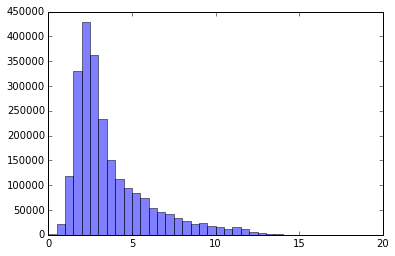

In [19]:
bins = np.arange(0, 20,0.5)

plt.hist(predicted_test_data,  bins=bins,alpha=0.5)

#Save predicted times

In [18]:
saveName = 'solution_' + modelName + '.tsv'

predicted_test_data.save(savePath + saveName, format='csv')

### Addition of a constant

In [9]:
predicted_test_data = predicted_test_data + 0.3

In [10]:
saveName = 'solution_' + modelName + '_c.tsv'

predicted_test_data.save(savePath + saveName, format='csv')